Sure. Here is the Python code to import the data and do EDA on the dataset in Google Colab:

In [5]:
# Importing the necessary python libraries (data wrangling and visualisation)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('/content/sample_data/Electric_Vehicle_Population_Data.csv')

# Get some summary statistics of the dataset
print(df.describe())

# Print the first few rows of the dataset
# print(df.head())
# Print the last few rows of the dataset
# print(df.tail())




         Postal Code     Model Year  Electric Range      Base MSRP  \
count  111050.000000  111053.000000   111053.000000  111053.000000   
mean    98170.811229    2019.770335       72.457628    1400.110578   
std      2395.351871       3.011399       97.887632    9580.575729   
min      1730.000000    1998.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98119.000000    2021.000000       21.000000       0.000000   
75%     98368.000000    2022.000000      149.000000       0.000000   
max     99701.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         110804.000000    1.110530e+05       1.110500e+05  
mean              29.556271    2.077656e+08       5.297288e+10  
std               14.785773    8.468117e+07       1.623414e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.635230e+08 

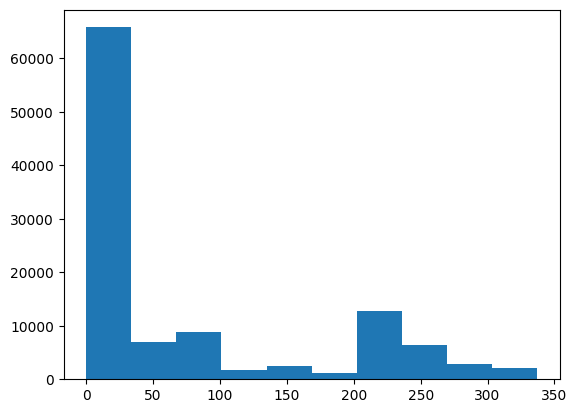

In [8]:

# Ploting a histogram of the range(miles) of the EV on a single charge
plt.hist(df['Electric Range'])
plt.show()


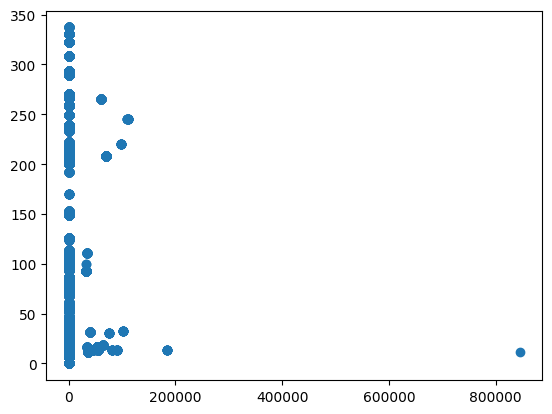

In [10]:
# Plot a scatter plot of the base MSRP vs. the electric range
plt.scatter(df['Base MSRP'], df['Electric Range'])
plt.show()

In [16]:

# Get the GeographicalState column
geographical_state_column = df['State']

# Count the occurrence of each state
state_counts = geographical_state_column.value_counts()

# Create a new DataFrame to store the results
state_counts_df = pd.DataFrame({
    'GeoState': state_counts.index,
    'Count': state_counts.values
})

# Print the state counts DataFrame
print(state_counts_df)


   GeoState   Count
0        WA  110804
1        CA      68
2        VA      26
3        MD      20
4        TX      15
5        IL       9
6        CO       9
7        HI       8
8        NC       7
9        CT       7
10       SC       7
11       AZ       6
12       GA       5
13       NV       5
14       OR       5
15       DC       5
16       LA       4
17       KS       4
18       NY       4
19       NJ       3
20       MA       3
21       MO       3
22       FL       3
23       NE       2
24       UT       2
25       BC       2
26       OH       2
27       DE       1
28       AL       1
29       MS       1
30       AK       1
31       OK       1
32       MN       1
33       RI       1
34       IN       1
35       MT       1
36       ID       1
37       KY       1
38       NM       1
39       NH       1
40       AP       1
41       WY       1


This code will first import the necessary libraries, then import the dataset from a CSV file. It will then print the first few rows of the dataset, get some summary statistics, plot a histogram of the electric range, and plot a scatter plot of the base MSRP vs. the electric range. It will also create a correlation matrix of the dataset and print the features that are most correlated with the electric range. Finally, it will perform further EDA on the selected features.

To run this code, you will need to create a Google Colab notebook and paste the code into the notebook. You will also need to upload the CSV file to your Google Drive. Once you have done this, you can run the code by clicking on the "Run" button.